Enter Value of K: 4
Test Point : 3.0,7.0
Distance 1 : 3.0	Class : 1.0
Distance 2 : 3.0	Class : 2.0
Distance 3 : 3.1622776601683795	Class : 1.0
Distance 4 : 3.1622776601683795	Class : 2.0
Predicted Class: 2.0
--------
Test Point : 7.0,7.0
Distance 1 : 0.0	Class : 1.0
Distance 2 : 1.0	Class : 1.0
Distance 3 : 1.0	Class : 1.0
Distance 4 : 1.4142135623730951	Class : 1.0
Predicted Class: 1.0
--------
Test Point : 4.0,3.0
Distance 1 : 0.0	Class : 2.0
Distance 2 : 1.0	Class : 2.0
Distance 3 : 1.0	Class : 2.0
Distance 4 : 1.4142135623730951	Class : 2.0
Predicted Class: 2.0
--------
Test Point : 2.0,8.0
Distance 1 : 4.123105625617661	Class : 1.0
Distance 2 : 4.123105625617661	Class : 2.0
Distance 3 : 4.123105625617661	Class : 2.0
Distance 4 : 4.47213595499958	Class : 1.0
Predicted Class: 2.0
--------
Test Point : 3.0,5.0
Distance 1 : 1.0	Class : 2.0
Distance 2 : 1.4142135623730951	Class : 2.0
Distance 3 : 2.0	Class : 2.0
Distance 4 : 2.23606797749979	Class : 2.0
Predicted Class: 2.0
--------
Te

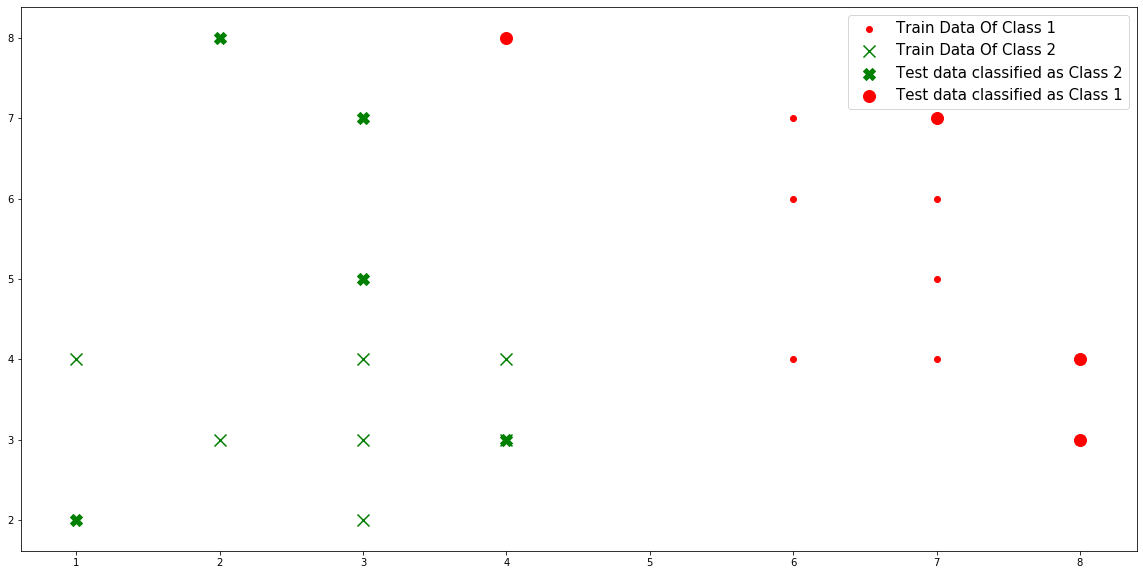

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib


plt.figure(figsize=(20,10));


def dis(x1,y1,x2,y2):
    return np.sqrt((np.power(x1-x2,2))+(np.power(y1-y2,2)));





df=pd.read_csv('train.txt',sep=',',header=None)
dVal=df.values;
train=dVal





for row in dVal:
    if row[2]==1:
        plt.scatter(row[0],row[1],color='red',marker='.',label='Train Data Of Class 1',s=12**2);
        
      
    if row[2]==2:
        plt.scatter(row[0],row[1],color='green',marker='x',label='Train Data Of Class 2',s=12**2);
        
        
        


k=int(input('Enter Value of K: '))


test=pd.read_csv('test.txt',sep=',',header=None)
test=test.values

d=[]
for x_test,y_test in test:
    distance=[]
    for x,y,l in train:
        
        distance.append([x_test,y_test,dis(x_test,y_test,x,y),l])
    distance.sort(key=lambda x: x[2])
    distance=np.array(distance)
    d.append(distance[0:k,:])
    
f = open("out.txt", "w")

for testpoint in d:
    class1_vote=0
    class2_vote=0
    flag=0;
    for x_test,y_test,distance,l in testpoint:
        if flag==0:
            
            s='Test Point : '+str(x_test)+','+str(y_test)
            print(s)
            f.write(s+'\n')
        flag=flag+1

        s='Distance '+str(flag)+' : '+str(distance)+'\tClass : '+str(l)
        print(s)
        f.write(s+'\n')
        
        if l==1.0:
            class1_vote=class1_vote+1

        else:
            class2_vote=class2_vote+1

    if class1_vote>class2_vote:
            plt.scatter(x_test,y_test,color='red',marker='o',label='Test data classified as Class 1',s=12**2);
            s='Predicted Class: 1.0'
            print(s)
            f.write(s+'\n')
            
    else:
            plt.scatter(x_test,y_test,color='green',marker='X',label='Test data classified as Class 2',s=12**2);
            s='Predicted Class: 2.0'
            print(s)
            f.write(s+'\n')
            


    print('--------')    
    
f.close()        

        



        
handles, labels = plt.gca().get_legend_handles_labels();
by_label = OrderedDict(zip(labels, handles));
plt.legend(by_label.values(), by_label.keys(),scatterpoints=1,fontsize=15);  

plt.show()

              